In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

### Загрузка и первичный анализ данных

Используем данные с сайта Book24

In [85]:
data = pd.read_json('data/project_book.json')

In [86]:
data.shape

(15000, 10)

In [87]:
data.dtypes

name            object
author          object
section         object
publish         object
age             object
year           float64
pages          float64
rating          object
cove            object
description     object
dtype: object

In [88]:
data.isnull().sum()

name             0
author           0
section          0
publish          0
age              0
year           222
pages          316
rating           0
cove             0
description      0
dtype: int64

In [89]:
data[(data.name == 'NaN')].shape

(232, 10)

In [90]:
data

,name,author,section,publish,age,year,pages,rating,cove,description
0,Благословение небожителей. Том 2,Тунсю Мосян,Новеллизации,Эксмо,18+,2022.0,432.0,5,https://ndc.book24.ru/resize/410x590/iblock/a5...,"Всё в этом мире имеет счёт: и удача, и невезен..."
1,Благословение небожителей. Том 1,Тунсю Мосян,Новеллизации,Эксмо,16+,2022.0,416.0,"4,9",https://ndc.book24.ru/resize/410x590/iblock/ac...,В незапамятные времена Се Лянь был наследным п...
2,Лето в пионерском галстуке,Сильванова Катерина,Современные любовные романы,Popcorn Books,18+,2021.0,544.0,"4,9",https://ndc.book24.ru/resize/410x590/iblock/25...,Юра возвращается в пионерский лагерь своей юно...
3,Электрошок. Внезапно,Сергей Тармашев,Социальная фантастика,АСТ,16+,2022.0,352.0,"0,0",https:https://cdn.book24.ru/v2/ASE000000000863...,Новая книга от автора культовых циклов «Древни...
4,Билли Саммерс,Стивен Кинг,Зарубежные детективы,АСТ,16+,2022.0,544.0,"4,4",https://ndc.book24.ru/resize/410x590/iblock/a2...,Новый увлекательный роман от автора культовых ...
...,...,...,...,...,...,...,...,...,...,...
14995,"Винт Разболтайло. Гениальный, как я",Руди Сальваньини,Комиксы для детей,АСТ,6+,2019.0,192.0,5,https:https://cdn.book24.ru/v2/ASE000000000837...,"Настоящий гений — личность, наделённая уникаль..."
14996,Тобол. Мало избранных,Алексей Иванов,Историческая проза,АСТ,16+,2019.0,832.0,"4,8",https:https://cdn.book24.ru/v2/ASE000000000842...,"Специальное издание к премьере фильма ""Тобол"" ..."
14997,Крыша мира,Владислав Выставной,Постапокалипсис,АСТ,18+,2019.0,352.0,"4,4",https:https://cdn.book24.ru/v2/ASE000000000841...,﻿Лед и камень сжали в кулак последний анклав ч...
14998,Убить пересмешника. Графический роман,Харпер Ли,Графические романы,АСТ,16+,2019.0,288.0,5,https:https://cdn.book24.ru/v2/ASE000000000840...,"Штат Алабама, 1930-е годы, время Великой Депре..."


### Гистограммы по признакам

In [91]:
data['section'].unique().shape[0]

153

<AxesSubplot:>

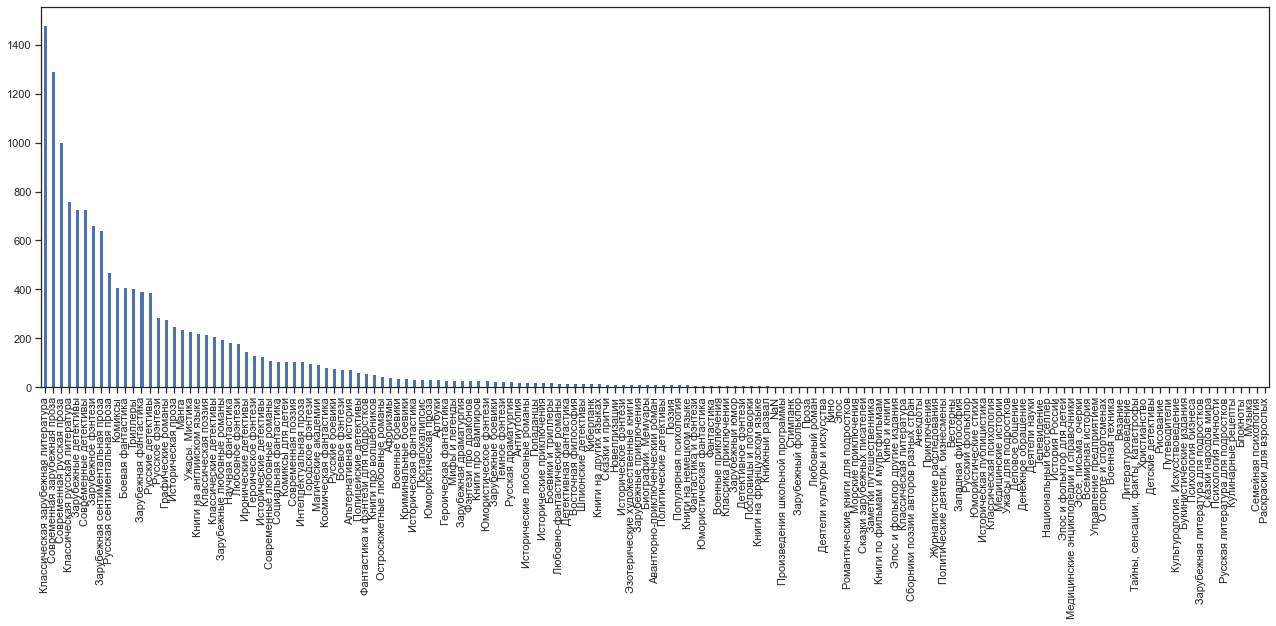

In [92]:
# Genre distribution
data['section'].value_counts().plot(x ='count', y = 'section', kind = 'bar', figsize = (22,7))

In [93]:
list = data['section'].unique()
delete = []
for i in range(data['section'].unique().shape[0]):
    if data[(data.section == list[i])].shape[0] < 5:
        delete.append(list[i])
list = ['NaN', 'Книги на английском языке', 'Артбуки', 'Восточная философия', 'Книги на других языках', 
              'Биографии. Мемуары', 'Книги на немецком языке', 'Пословицы и поговорки', 'Деятели культуры и искусства']
for i in range(len(list)):
    delete.append(list[i])
delete

['Классическая психология',
 'Сказки зарубежных писателей',
 'Ужасы для подростков',
 'Романтические книги для подростков',
 'Историческая публицистика',
 'Эпос',
 'Семейная психология',
 'Медицинские истории',
 'Заметки путешественника',
 'Журналистские расследования',
 'Политические деятели, бизнесмены',
 'Русский фольклор',
 'Кулинарные рецепты',
 'Медицинские энциклопедии и справочники',
 'Морские приключения',
 'Русская литература для подростков',
 'Деятели науки',
 'Психология бизнеса',
 'Книги по фильмам и мультфильмам',
 'Классическая литература',
 'Зарубежная литература для подростков',
 'Культурология. Искусствоведение',
 'Приключения',
 'Юмористические стихи',
 'Психология личности',
 'Всемирная история',
 'Вестерны',
 'Музыка',
 'История России',
 'Западная философия',
 'Эссе, письма, очерки',
 'Литературоведение',
 'Рисование',
 'Кино',
 'Раскраски для взрослых',
 'Блокноты',
 'Деятели культуры и искусства',
 'Телевидение',
 'Анекдоты',
 'Кино и книги',
 'Эпос и фольклор д

In [94]:
len(delete)

65

In [95]:
for i in range(len(delete)):
    list = data5[(data5.section == delete[i])].index
    data5 = data5.drop(index=list)
(data.shape, data5.shape)

((15000, 10), (14579, 10))

<AxesSubplot:>

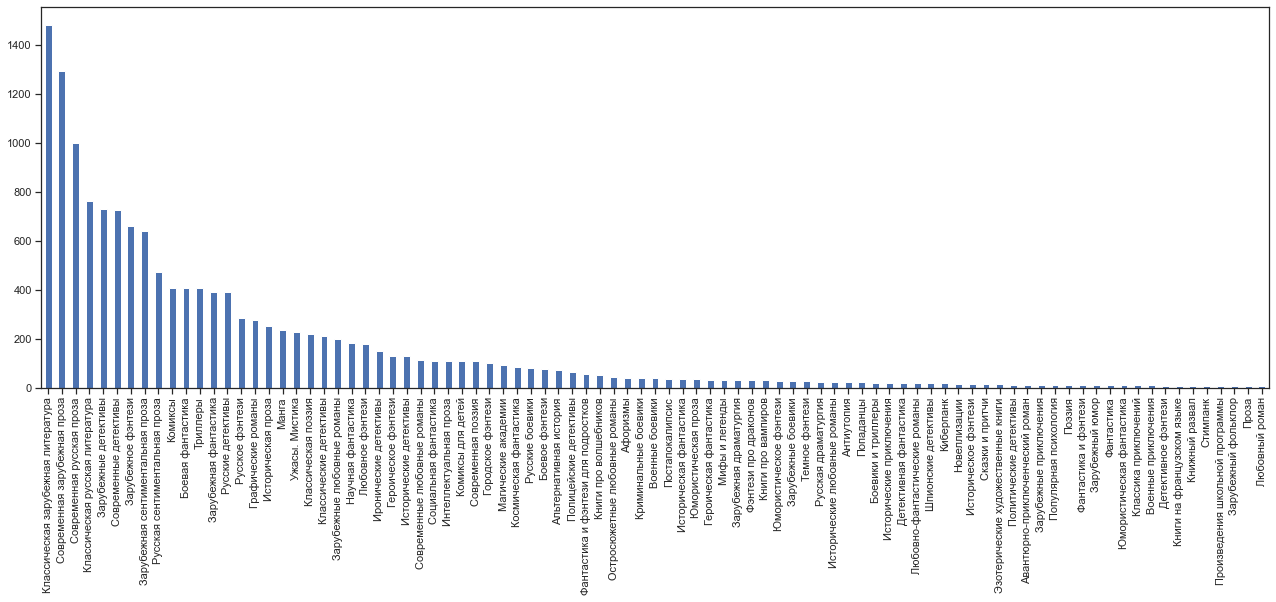

In [96]:
# Genre distribution
data5['section'].value_counts().plot(x ='count', y = 'section', kind = 'bar', figsize = (22,7))